<h1>Revisions of blastoid figure</h1>

Reviewers asked to have less cell types shown in my figures

In [2]:
setwd("/staging/leuven/stg_00041/Bradley/")

library(umap)
library(ggplot2)
library(Seurat)
library(reshape2)
library(plyr)
library(dplyr)
library(gridExtra)
library(RColorBrewer)
library(ggpubr)
library(ggrepel)
library(viridis)


Attaching SeuratObject


Attaching package: ‘dplyr’


The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine



Attaching package: ‘ggpubr’


The following object is masked from ‘package:plyr’:

    mutate


Loading required package: viridisLite



In [2]:
outFilePrefix <- "/data/leuven/343/vsc34313/jupyter_notebooks/integrateBlastoids/RevisionsGraphs/Blastoid."

<h2> Split and reintegrate to remove extra cell types</h2>

In [83]:
load("inegrate.PRTwPasqueEXM.Robject")

In [84]:
submittedSeurat<- combinedCountsSeuratReintegrated

In [ ]:
for(i in 1:length(combinedCountsSeuratSplit)){
 print(table(combinedCountsSeuratSplit[[i]]@meta.data$finalLabels)) 
    
}


    Blastoid EXMC Blastoid Epiblast       Blastoid PE       Blastoid TE 
               48               905               134               498 
     Kagawa Naive     Kagawa Primed 
              140               123 

 Pet. 8 cells    Pet. B1_B2 Pet. Early TB Pet. Early TE Pet. Epiblast 
           80           163            36           202           151 
 Pet. Late TE  Pet. Med. TB  Pet. Med. TE   Pet. Morula       Pet. PE 
          285            53           263           146            25 

      Tyser Adv. Meso.       Tyser Axi. Meso.         Tyser Ectoderm 
                   159                     23                     29 
      Tyser Eme. Meso.         Tyser Endoderm         Tyser Epiblast 
                   181                    135                    119 
    Tyser Erythrocytes       Tyser Hem. Prog.       Tyser Nas. Meso. 
                    28                    103                     93 
Tyser Primitive Streak         Tyser YS Meso. 
                   199    

In [131]:
combinedCountsSeuratSplit <- SplitObject(submittedSeurat, split.by="study")

In [132]:
lineageCenters <- function(combinedSeurat){
    lineageCenters <- data.frame(lineage=unique(combinedSeurat@meta.data$finalLabels), UMAP1=NA, UMAP2=NA)
    for(i in 1:nrow(lineageCenters)){
        lineageCenters$UMAP1[i] <- mean(combinedSeurat@reductions$umap@cell.embeddings[which(
            combinedSeurat@meta.data$finalLabels==lineageCenters$lineage[i]),1], na.rm=T)
        lineageCenters$UMAP2[i] <- mean(combinedSeurat@reductions$umap@cell.embeddings[which(
            combinedSeurat@meta.data$finalLabels==lineageCenters$lineage[i]),2], na.rm=T)
    }
    
    return(lineageCenters)
}

In [133]:
allIntegrate <- function(combinedCountsSeuratSplit){
    features <- SelectIntegrationFeatures(object.list=combinedCountsSeuratSplit)

    anchors <- FindIntegrationAnchors(combinedCountsSeuratSplit, anchor.features=features)

    combinedCountsSeuratReintegrated <- IntegrateData(anchorset=anchors, dims=1:50)

    combinedCountsSeuratReintegrated <- ScaleData(combinedCountsSeuratReintegrated, verbose=FALSE)
    combinedCountsSeuratReintegrated <- RunPCA(combinedCountsSeuratReintegrated, npcs=30, verbose=FALSE)

    combinedCountsSeuratReintegrated <- FindNeighbors(combinedCountsSeuratReintegrated, reduction="pca", dims=1:30)

    combinedCountsSeuratReintegrated <- suppressMessages(RunUMAP(combinedCountsSeuratReintegrated, reduction="pca", dims=1:30, seed.use = 123))
    return(combinedCountsSeuratReintegrated)
}

In [134]:
suppressMessages(combinedCountsSeuratReintegrated <- allIntegrate(combinedCountsSeuratSplit))

In [135]:
    combinedCountsSeuratReintegrated.lineageCenters <- lineageCenters(combinedCountsSeuratReintegrated)

Warning message:
"Removed 1 rows containing missing values (geom_text_repel)."
Warning message:
"ggrepel: 7 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


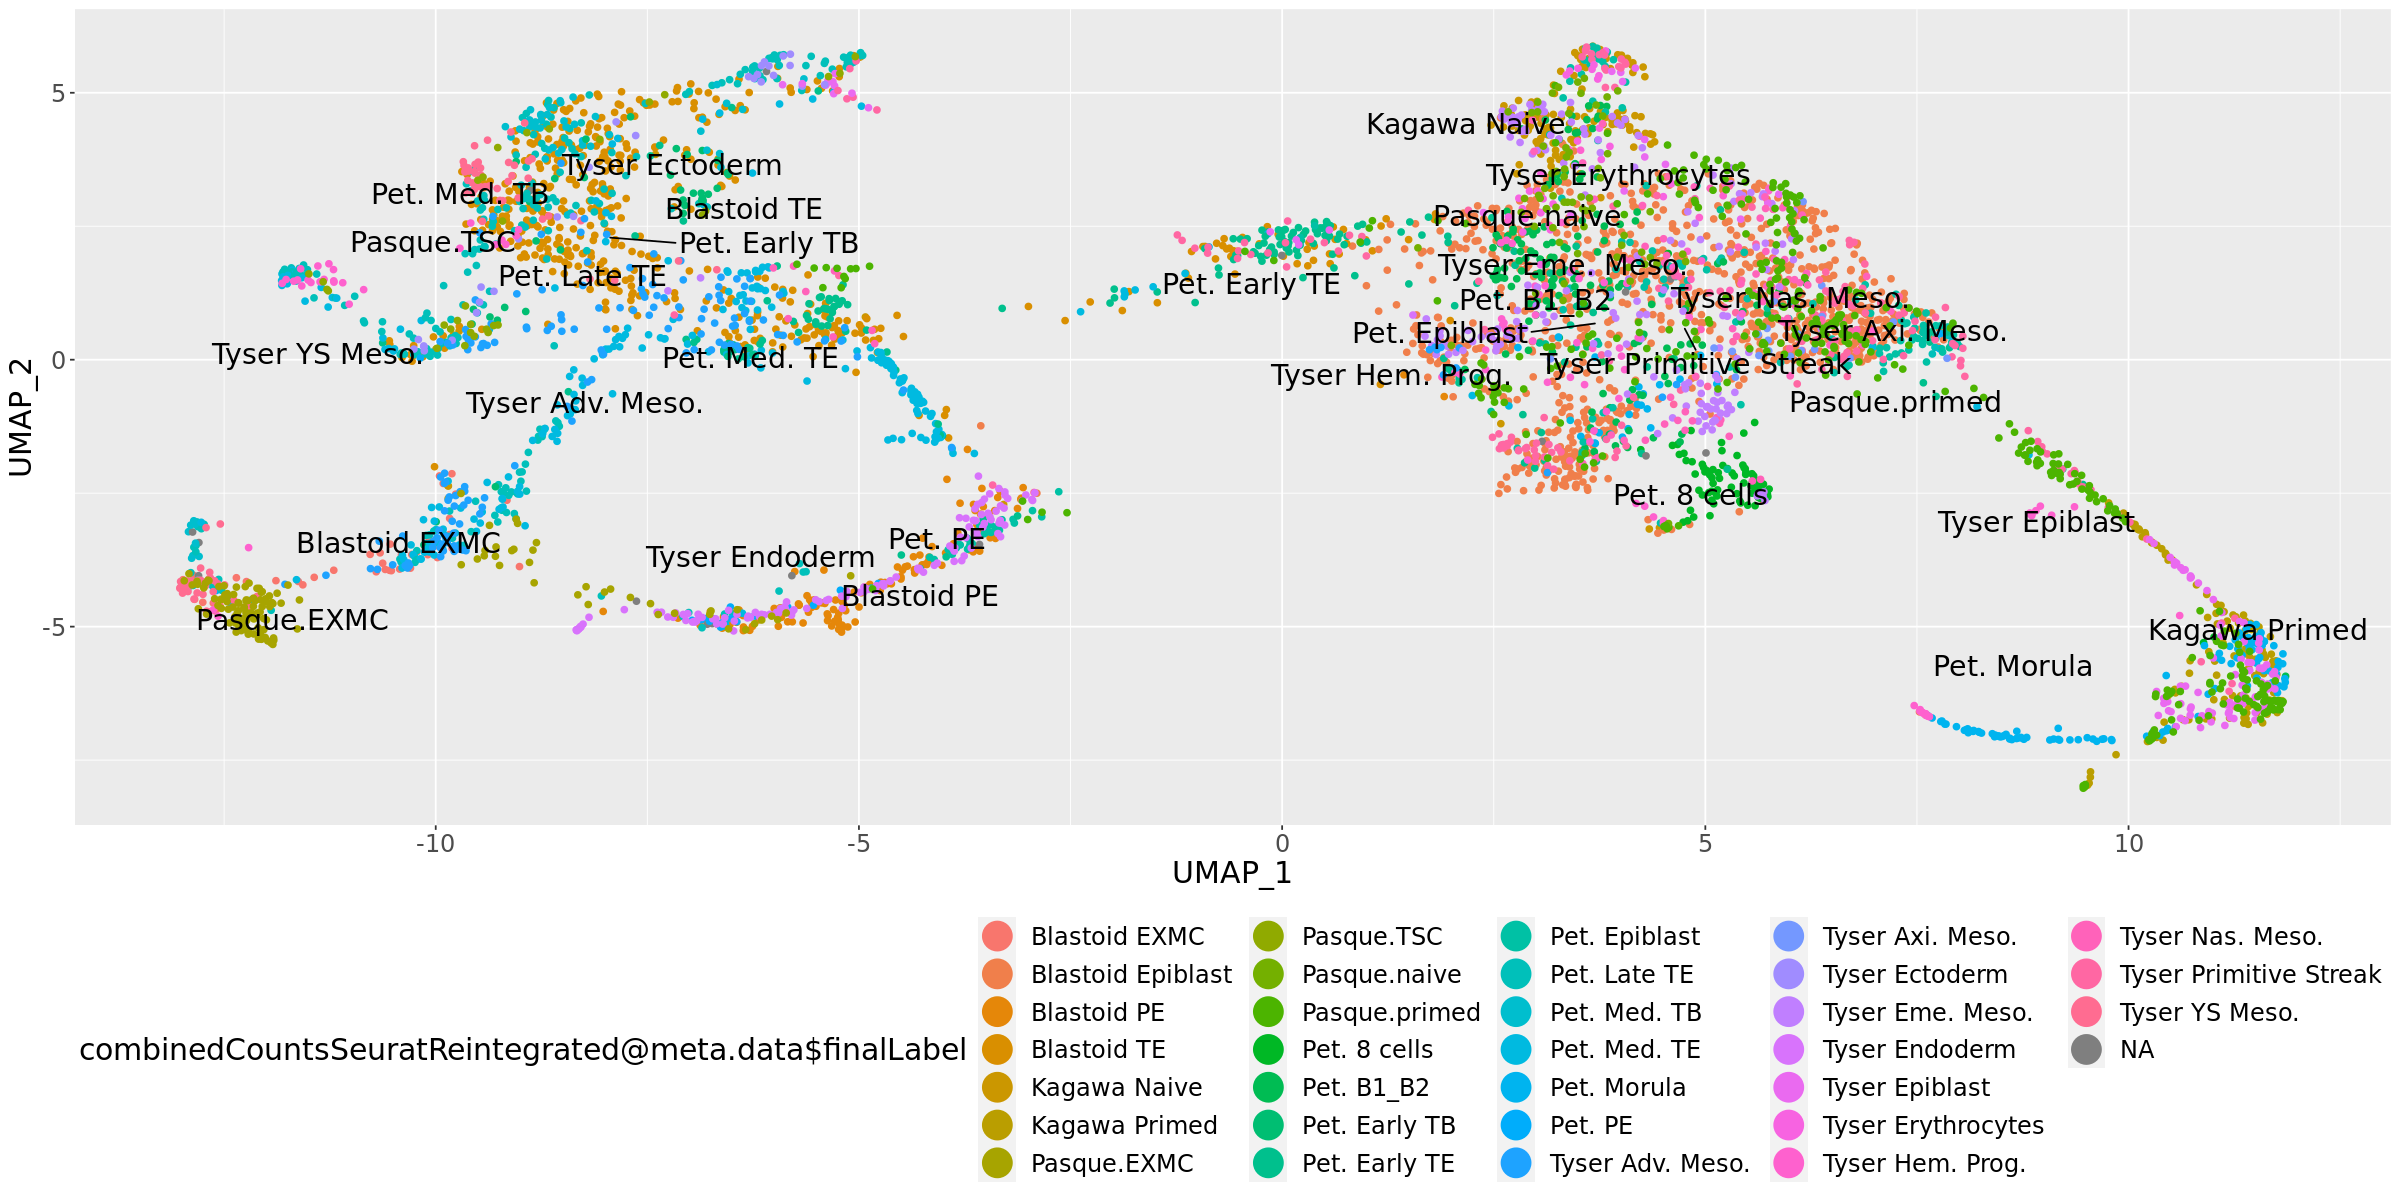

In [136]:
options(repr.plot.width=20, repr.plot.height=10)
ggplot(data.frame(combinedCountsSeuratReintegrated@reductions$umap@cell.embeddings), aes(x=UMAP_1, y=UMAP_2, color=combinedCountsSeuratReintegrated@meta.data$finalLabel))+
geom_point()+
theme(legend.position="bottom")+
geom_text_repel(data=combinedCountsSeuratReintegrated.lineageCenters,
                  aes(x=UMAP1, y=UMAP2, label=lineage),  size=6, color="black")+
guides(colour = guide_legend(override.aes = list(size=8)))+theme(text=element_text(size=18))


In [197]:
qual_col_pals = brewer.pal.info[brewer.pal.info$category == "qual",]
col_vector = unlist(mapply(brewer.pal, qual_col_pals$maxcolors, rownames(qual_col_pals)))

col_vector<- sample(col_vector, replace = F)

Function to graph each lineage over the UMAP individually

In [184]:
graphSpecificLineage <- function(lineageToGraph, outname, custColor=NA, colorLabelRow=1){
    #jpeg(outname, width=1920, height=1080)#change text size to 18, override.aes size to 8
    pdf(outname, width=2, height=2 ) #also change text size back to 7, change override.aes size back to 1

    
    if(all(is.na(custColor))){
     custColor=brewer.pal(n=length(lineageToGraph), name="Dark2")   
    }
    
    names(custColor)<- lineageToGraph
print(ggplot(data.frame(combinedCountsSeuratReintegrated@reductions$umap@cell.embeddings), aes(x=UMAP_1, y=UMAP_2))+
geom_point(data=data.frame(combinedCountsSeuratReintegrated@reductions$umap@cell.embeddings, 
                                       lineage=combinedCountsSeuratReintegrated@meta.data$finalLabels,
                                      study=combinedCountsSeuratReintegrated@meta.data$study), 
                 aes(x=UMAP_1, y=UMAP_2),color="grey", size=0.001)+
geom_point(data=data.frame(combinedCountsSeuratReintegrated@reductions$umap@cell.embeddings, 
                                       lineage=combinedCountsSeuratReintegrated@meta.data$finalLabels,
                                      study=combinedCountsSeuratReintegrated@meta.data$study)[which(combinedCountsSeuratReintegrated@meta.data$finalLabels%in%lineageToGraph),], 
                 aes(x=UMAP_1, y=UMAP_2, color=lineage), size=0.001)+
      theme_linedraw()+
theme(legend.position="bottom", panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
guides(colour = guide_legend(override.aes = list(size=1), nrow=colorLabelRow))+
      theme(text=element_text(size=7), axis.line = element_blank(), axis.text  = element_blank(), panel.border = element_blank(), axis.ticks = element_blank())+
      scale_color_manual(values=custColor, name=NULL)+xlab(NULL)+ylab(NULL)
)

dev.off()
}

In [139]:
outFilePrefix <- "/data/leuven/343/vsc34313/jupyter_notebooks/integrateBlastoids/RevisionsGraphs/Blastoid/sameAsSubmitted/"

In [172]:
for(i in unique(combinedCountsSeuratReintegrated@meta.data$finalLabels)){
    graphSpecificLineage(outname = paste(c( outFilePrefix, i,  ".pdf"), collapse=""), 
                         lineageToGraph = i)

}

In [142]:
graphSpecificLineage(outname = paste(c( outFilePrefix,  "allEXMC" , ".pdf"), collapse=""), colorLabelRow = 3,
                         lineageToGraph = c("Blastoid EXMC", "Pasque.EXMC", "Tyser YS Meso.", "Tyser Adv. Meso."))

png 
  2

In [151]:
save(combinedCountsSeuratReintegrated, file="revisionsRobjects/blastoid.sameAsSubmitted.Robject")

<h2> removing different cell types to determine what is important to the integration </h2>

<h3> no early pretropoulos</h3>

In [152]:
combinedCountsSeuratSplit <- SplitObject(submittedSeurat, split.by="study")

In [153]:
combinedCountsSeuratSplit[[2]] <- subset(combinedCountsSeuratSplit[[2]], subset=finalLabels%in%c("Pet. Early TB", "Pet. Early TE", "Pet. Epiblast",
                                                                                                "Pet. Late TE","Pet. Med. TB", "Pet. Med. TE", "Pet. PE"))
#combinedCountsSeuratSplit[[3]] <- subset(combinedCountsSeuratSplit[[3]], subset=finalLabels%in%c("Tyser Ectoderm", "Tyser Endoderm", "Tyser Epiblast", "Tyser YS Meso.",
#                                                                                                "Tyser Adv. Meso."))

In [154]:
suppressMessages(combinedCountsSeuratReintegrated <- allIntegrate(combinedCountsSeuratSplit))

In [155]:
    combinedCountsSeuratReintegrated.lineageCenters <- lineageCenters(combinedCountsSeuratReintegrated)

Warning message:
"ggrepel: 6 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


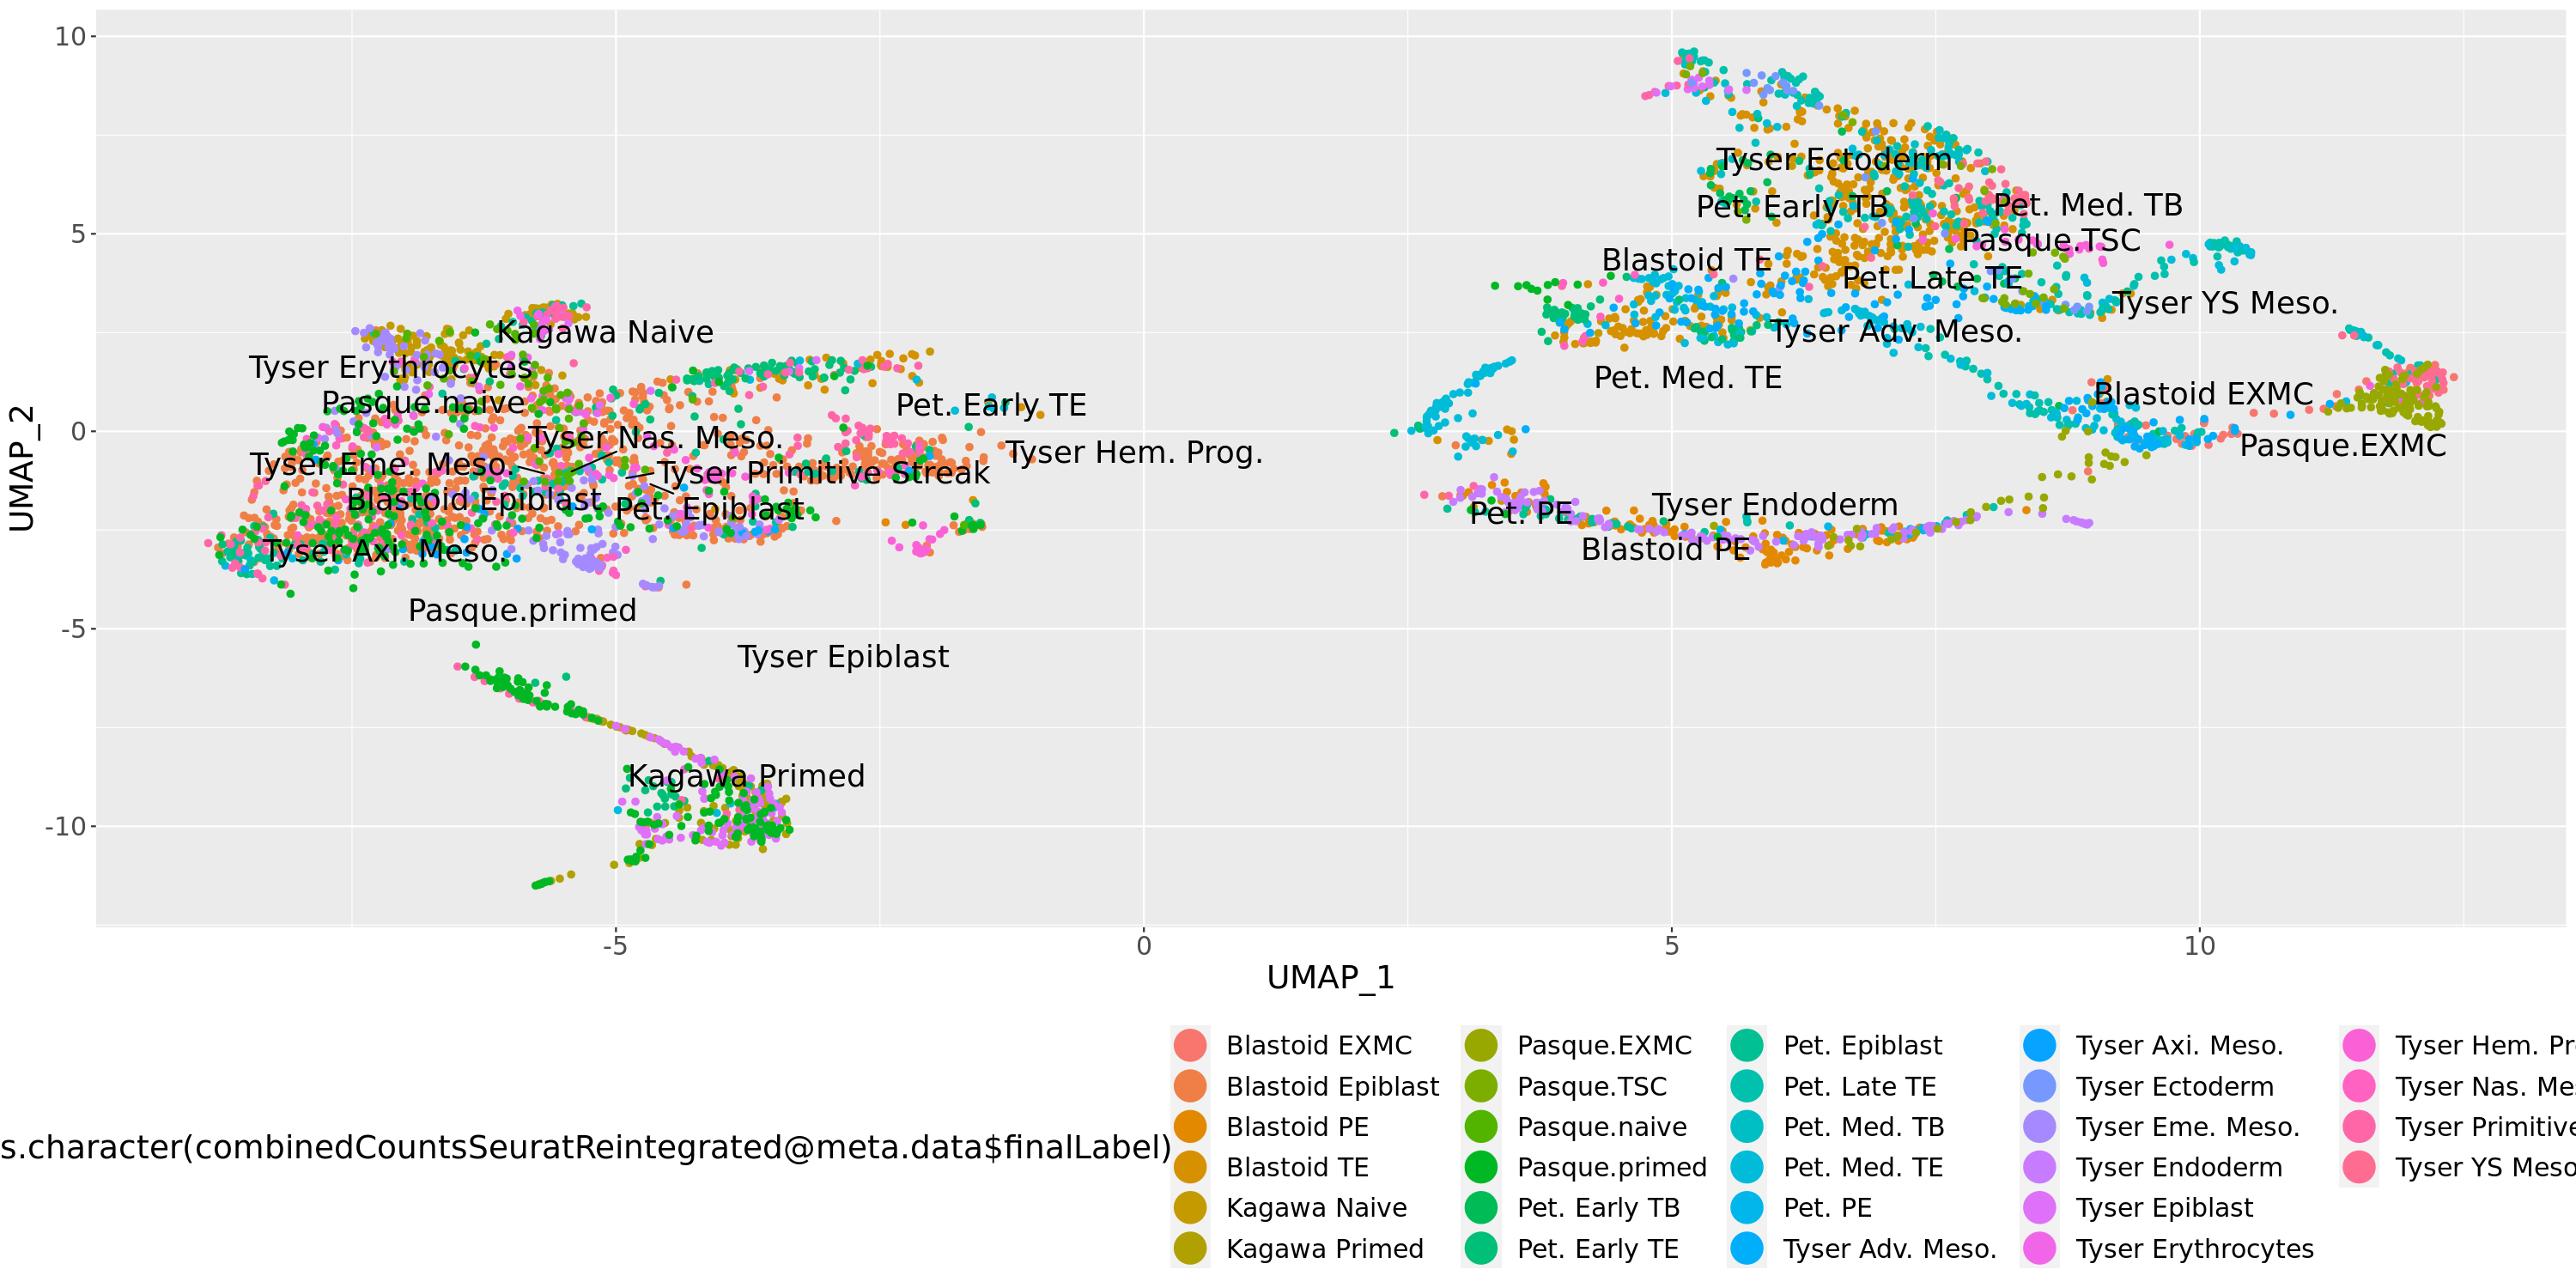

In [156]:
options(repr.plot.width=20, repr.plot.height=10)
ggplot(data.frame(combinedCountsSeuratReintegrated@reductions$umap@cell.embeddings), aes(x=UMAP_1, y=UMAP_2, 
                                                                                         color=as.character(combinedCountsSeuratReintegrated@meta.data$finalLabel)))+
geom_point()+
theme(legend.position="bottom")+
geom_text_repel(data=combinedCountsSeuratReintegrated.lineageCenters,
                  aes(x=UMAP1, y=UMAP2, label=lineage),  size=6, color="black")+
guides(colour = guide_legend(override.aes = list(size=8)))+theme(text=element_text(size=18))


In [157]:
outFilePrefix <- "/data/leuven/343/vsc34313/jupyter_notebooks/integrateBlastoids/RevisionsGraphs/Blastoid/noEarlyPetropoulos/"

In [158]:
for(i in unique(combinedCountsSeuratReintegrated@meta.data$finalLabels)){
    graphSpecificLineage(outname = paste(c( outFilePrefix,  i,  ".pdf"), collapse=""), 
                         lineageToGraph = i)

}

Warning message in if (is.na(custColor)) {:
"the condition has length > 1 and only the first element will be used"
Warning message in if (is.na(custColor)) {:
"the condition has length > 1 and only the first element will be used"
Warning message in if (is.na(custColor)) {:
"the condition has length > 1 and only the first element will be used"
Warning message in if (is.na(custColor)) {:
"the condition has length > 1 and only the first element will be used"
Warning message in if (is.na(custColor)) {:
"the condition has length > 1 and only the first element will be used"
Warning message in if (is.na(custColor)) {:
"the condition has length > 1 and only the first element will be used"
Warning message in if (is.na(custColor)) {:
"the condition has length > 1 and only the first element will be used"
Warning message in if (is.na(custColor)) {:
"the condition has length > 1 and only the first element will be used"
Warning message in if (is.na(custColor)) {:
"the condition has length > 1 and on

In [159]:
graphSpecificLineage(outname = paste(c( outFilePrefix,  "allEXMC" , ".pdf"), collapse=""), colorLabelRow = 3,
                         lineageToGraph = c("Blastoid EXMC", "Pasque.EXMC", "Tyser YS Meso.", "Tyser Adv. Meso."))

Warning message in if (is.na(custColor)) {:
"the condition has length > 1 and only the first element will be used"


png 
  2

In [160]:
save(combinedCountsSeuratReintegrated, file="revisionsRobjects/blastoid.noEarlyPetropoulos.Robject")

<h3> no early pet or tyser meso or tyser blood. I chose this fr=or the revisions figure </h3>

In [161]:
combinedCountsSeuratSplit <- SplitObject(submittedSeurat, split.by="study")

In [162]:
combinedCountsSeuratSplit[[2]] <- subset(combinedCountsSeuratSplit[[2]], subset=finalLabels%in%c("Pet. Early TB", "Pet. Early TE", "Pet. Epiblast",
                                                                                                "Pet. Late TE","Pet. Med. TB", "Pet. Med. TE", "Pet. PE"))
combinedCountsSeuratSplit[[3]] <- subset(combinedCountsSeuratSplit[[3]], subset=finalLabels%in%c("Tyser Ectoderm", "Tyser Endoderm", "Tyser Epiblast", "Tyser YS Meso."))

In [163]:
suppressMessages(combinedCountsSeuratReintegrated <- allIntegrate(combinedCountsSeuratSplit))

In [164]:
    combinedCountsSeuratReintegrated.lineageCenters <- lineageCenters(combinedCountsSeuratReintegrated)

Warning message:
"ggrepel: 1 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


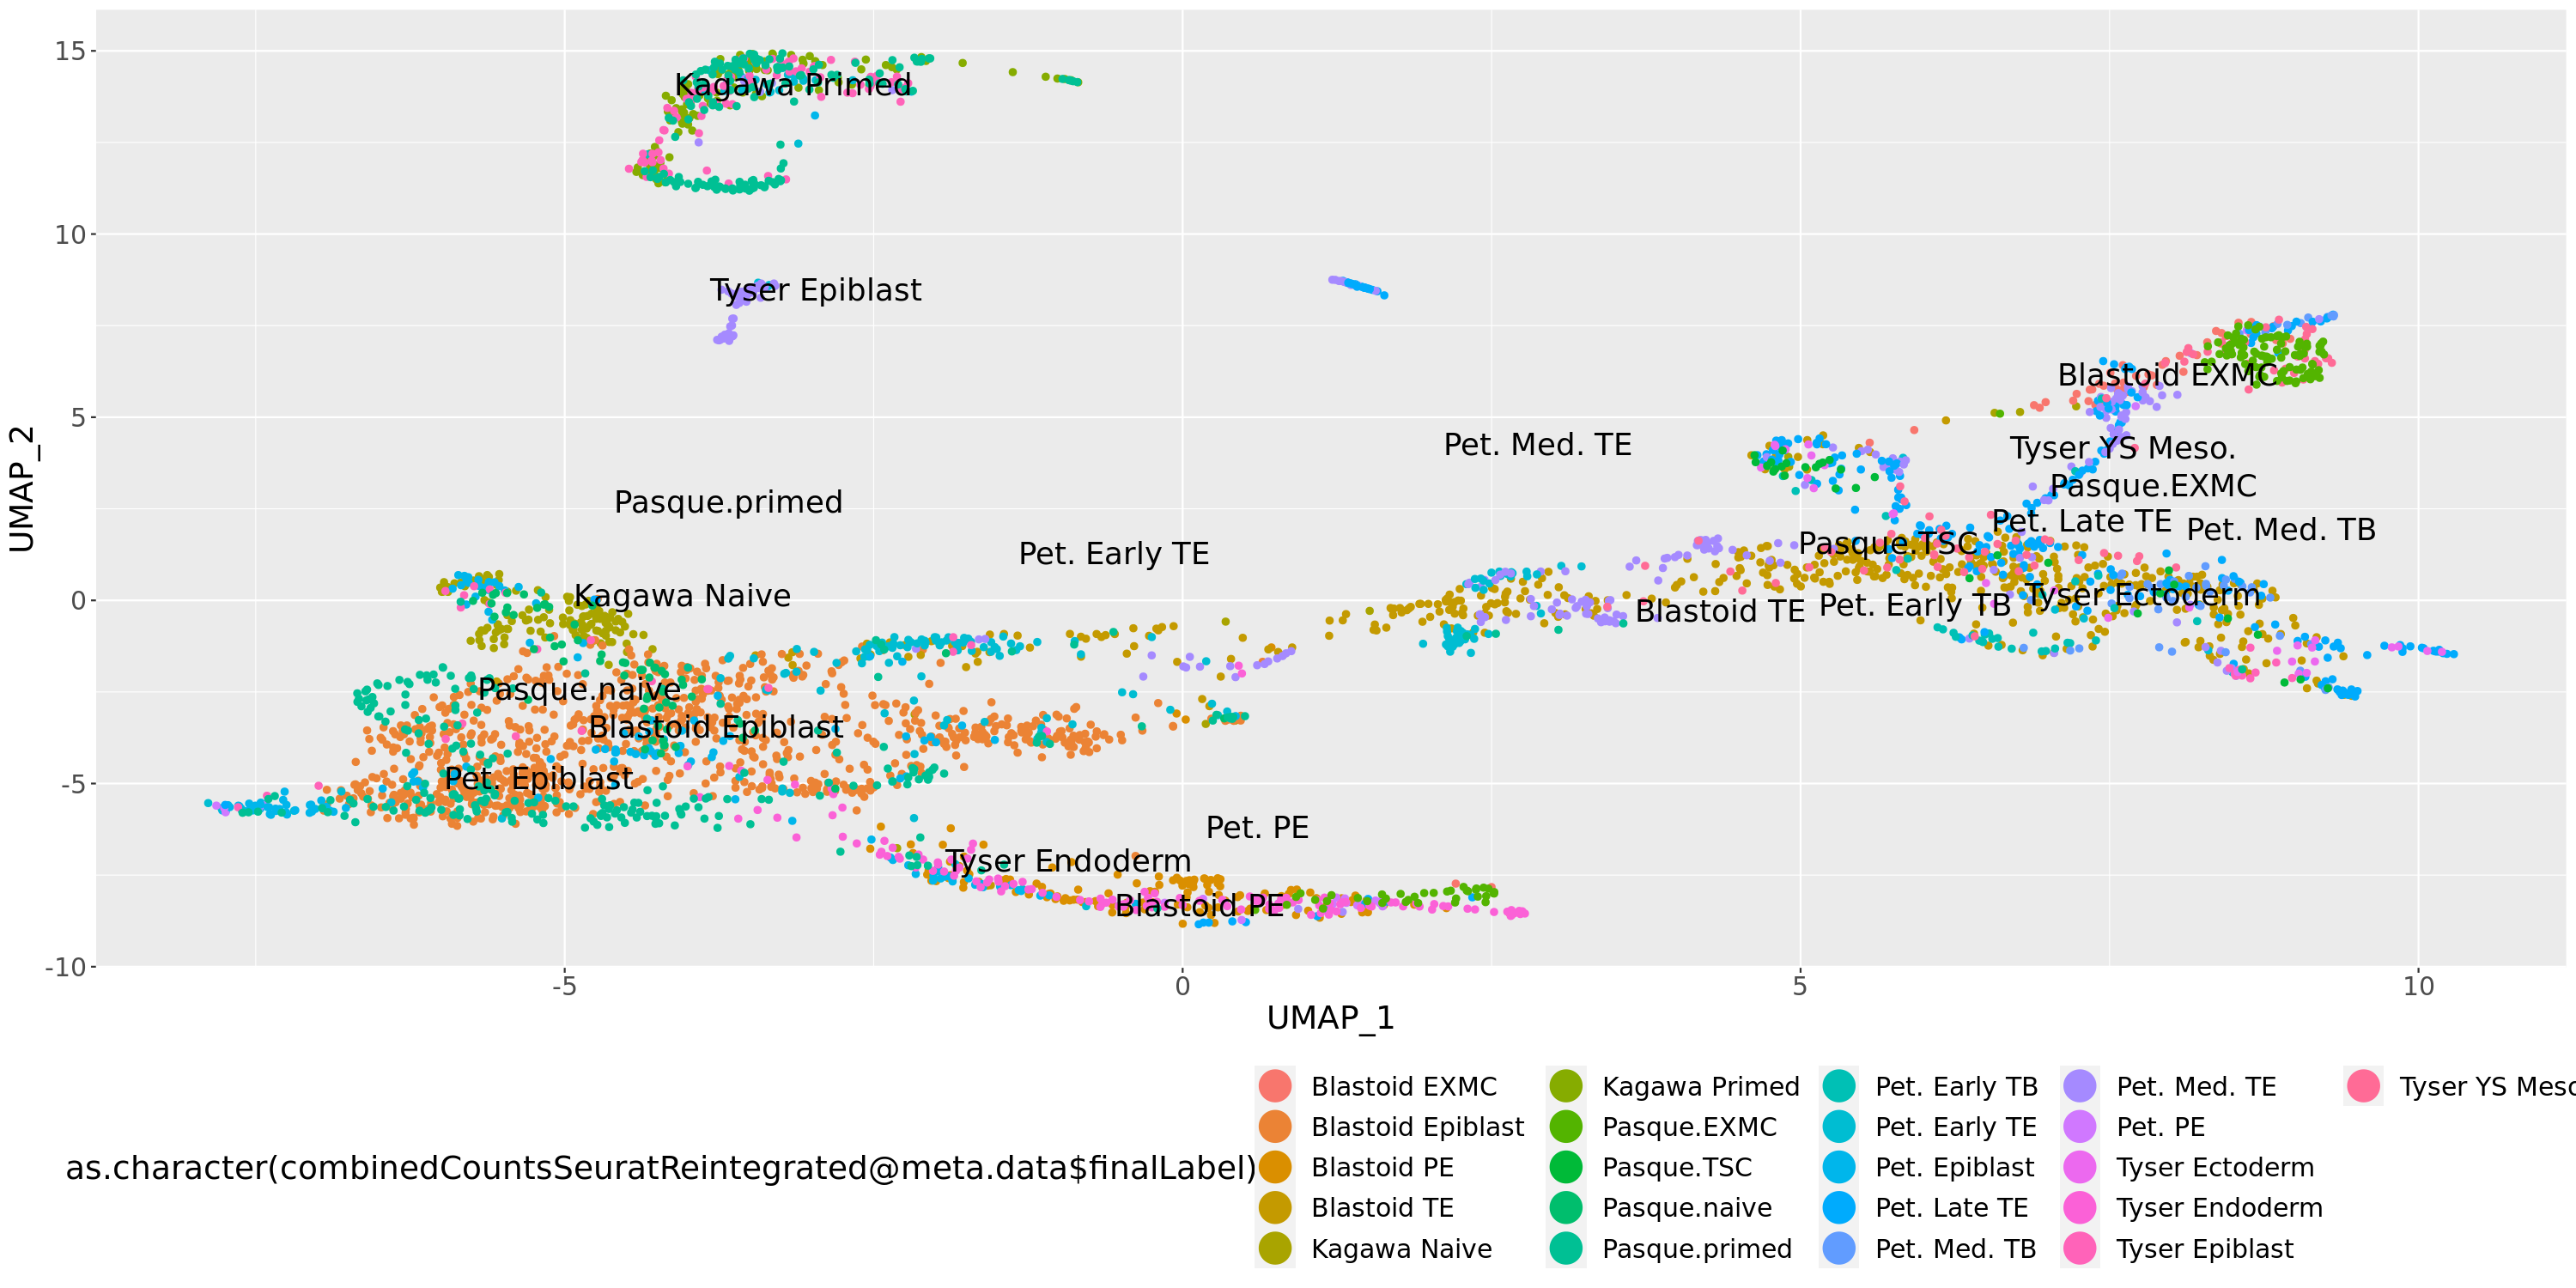

In [165]:
options(repr.plot.width=20, repr.plot.height=10)
ggplot(data.frame(combinedCountsSeuratReintegrated@reductions$umap@cell.embeddings), aes(x=UMAP_1, y=UMAP_2, 
                                                                                         color=as.character(combinedCountsSeuratReintegrated@meta.data$finalLabel)))+
geom_point()+
theme(legend.position="bottom")+
geom_text_repel(data=combinedCountsSeuratReintegrated.lineageCenters,
                  aes(x=UMAP1, y=UMAP2, label=lineage),  size=6, color="black")+
guides(colour = guide_legend(override.aes = list(size=8)))+theme(text=element_text(size=18))


In [7]:
outFilePrefix <- "/data/leuven/343/vsc34313/jupyter_notebooks/integrateBlastoids/RevisionsGraphs/Blastoid/noEarlyPetropoulosOrTyserMesoBlood/"

In [227]:
combinedCountsSeuratReintegrated@meta.data$finalLabels <- factor(combinedCountsSeuratReintegrated@meta.data$finalLabels, 
                                                                 levels=c("Pasque.naive", "Kagawa Naive",  "Pet. Epiblast", "Tyser Epiblast", "Pasque.primed","Kagawa Primed","Blastoid Epiblast",
                                                                         "Pet. Early TE", "Pet. Med. TE", "Pet. Late TE",  "Pet. Early TB", "Pet. Med. TB", "Pasque.TSC","Blastoid TE",
                                                                         "Tyser YS Meso.",  "Pasque.EXMC","Blastoid EXMC",
                                                                         "Pet. PE",  "Tyser Endoderm", "Blastoid PE",
                                                                         "Tyser Ectoderm"))

In [230]:
col_vector <- c(brewer.pal(8, "Greens")[2:8], brewer.pal(8, "Blues")[2:8], c("salmon", "red", "dark red"), brewer.pal(4, "Purples")[2:4], "orange")

In [231]:
options(repr.plot.width=25, repr.plot.height=30)
pdf(paste(c( outFilePrefix, "integration.allShown.pdf"), collapse=""), width=8.3, height=6)
ggplot(data.frame(combinedCountsSeuratReintegrated@reductions$umap@cell.embeddings), aes(x=UMAP_1, y=UMAP_2))+
geom_point(data=data.frame(combinedCountsSeuratReintegrated@reductions$umap@cell.embeddings, 
                                       lineage=combinedCountsSeuratReintegrated@meta.data$finalLabels,
                                      study=combinedCountsSeuratReintegrated@meta.data$study), 
                 aes(x=UMAP_1, y=UMAP_2, color=lineage), size=0.75)+
theme(legend.position="right")+
geom_text_repel(data=combinedCountsSeuratReintegrated.lineageCenters,
                  aes(x=UMAP1, y=UMAP2, label=lineage),  size=3, color="black")+theme_linedraw()+
guides(colour = guide_legend(override.aes = list(size=2), ncol=1))+
theme(text=element_text(size=7), panel.grid = element_blank(), axis.ticks = element_blank(), axis.text=element_blank(), axis.line = element_blank(), panel.border = element_blank())+
xlab("")+ylab("")+scale_color_manual(values=col_vector)


dev.off()

png 
  2

In [232]:
for(i in 1:length(unique(combinedCountsSeuratReintegrated@meta.data$finalLabels))){
    graphSpecificLineage(outname = paste(c( outFilePrefix,  levels(combinedCountsSeuratReintegrated@meta.data$finalLabels)[i],  ".pdf"), collapse=""), custColor = col_vector[i],
                         lineageToGraph = levels(combinedCountsSeuratReintegrated@meta.data$finalLabels)[i])

}

In [234]:
graphSpecificLineage(outname = paste(c( outFilePrefix,  "allEXMC" , ".pdf"), collapse=""), colorLabelRow = 2, custColor = c("red", "green", "orange"),
                         lineageToGraph = c("Blastoid EXMC", "Pasque.EXMC", "Tyser YS Meso."))

png 
  2

In [235]:
graphSpecificLineage(outname = paste(c( outFilePrefix,  "allEpi" , ".pdf"), collapse=""), colorLabelRow = 2,custColor = c("light green", "pink", "blue", "orange", "dark green", "dark red", "red"),
                         lineageToGraph = c("Pasque.naive", "Kagawa Naive",  "Pet. Epiblast", "Tyser Epiblast", "Pasque.primed","Kagawa Primed","Blastoid Epiblast"))

png 
  2

In [236]:
graphSpecificLineage(outname = paste(c( outFilePrefix,  "allTETB" , ".pdf"), collapse=""), colorLabelRow = 2, custColor = c(brewer.pal(6, "Blues")[2:6], "green", "red"),
                         lineageToGraph = c("Pet. Early TE", "Pet. Med. TE", "Pet. Late TE",  "Pet. Early TB", "Pet. Med. TB", "Pasque.TSC","Blastoid TE"))

png 
  2

In [237]:
graphSpecificLineage(outname = paste(c( outFilePrefix,  "allPE" , ".pdf"), collapse=""), colorLabelRow = 2, custColor = c("red", "blue", "orange"),
                         lineageToGraph = c("Blastoid PE", "Pet. PE",  "Tyser Endoderm"))

png 
  2

<h4> featureMaps for reviewer comments </h4>

In [12]:
options(repr.plot.width=25, repr.plot.height=30)

combinedCountsSeuratReintegrated@active.assay <- "RNA"
pdf(paste(c( outFilePrefix,  "markerGeneUMAPs" , ".pdf"), collapse=""), width=12, height=16)
FeaturePlot(combinedCountsSeuratReintegrated, features=c("VIM", "POSTN", "BST2", "NR2F2",  "CDH1", "GATA4", "GATA6",  "PDGFRA", "KRT7", "GATA3", "NANOG", "SOX2"), ncol=3)
dev.off()

combinedCountsSeuratReintegrated@active.assay <- "integrated"

png 
  2

In [169]:
save(combinedCountsSeuratReintegrated, file="revisionsRobjects/blastoid.noEarlyPetropoulosOrTyserMesoBlood.Robject")

In [3]:
load("revisionsRobjects/blastoid.noEarlyPetropoulosOrTyserMesoBlood.Robject")